# Epidemic and Financial Market Analysis Project

**Purpose:**  
This notebook is used to prepare and merge data from outbreak timelines, Google Trends, and financial markets to explore whether public interest in epidemics correlates with financial behavior like S&P 500 returns and volatility.

**Notebook Tasks:**
- Define outbreak periods and key events
- Collect and clean financial data
- Aggregate and merge data sources
- Label data for outbreak/event periods
- Prepare outputs for further analysis or visualization


In [1]:
import pandas as pd

outbreaks = [
    {"outbreak": "SARS", "start_date": "2003-02-01", "end_date": "2003-07-31", "region": "Asia, Canada, US", "virus_type": "Coronavirus"},
    {"outbreak": "H1N1", "start_date": "2009-04-01", "end_date": "2010-08-31", "region": "Global", "virus_type": "Influenza"},
    {"outbreak": "Ebola", "start_date": "2014-03-01", "end_date": "2016-06-09", "region": "Africa, US", "virus_type": "Viral Hemorrhagic"},
    {"outbreak": "Zika", "start_date": "2016-01-01", "end_date": "2017-11-30", "region": "Americas", "virus_type": "Mosquito-borne"},
    {"outbreak": "COVID-19", "start_date": "2020-01-01", "end_date": "2022-12-31", "region": "Global", "virus_type": "Coronavirus"}
]

df_outbreaks = pd.DataFrame(outbreaks)
df_outbreaks.to_csv("data/outbreak_events.csv", index=False)

df_outbreaks


/home/fb0618c7-72d1-4913-ba37-d54853b4890d/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


outbreak  start_date    end_date            region         virus_type
0      SARS  2003-02-01  2003-07-31  Asia, Canada, US        Coronavirus
1      H1N1  2009-04-01  2010-08-31            Global          Influenza
2     Ebola  2014-03-01  2016-06-09        Africa, US  Viral Hemorrhagic
3      Zika  2016-01-01  2017-11-30          Americas     Mosquito-borne
4  COVID-19  2020-01-01  2022-12-31            Global        Coronavirus

In [2]:
event_dates = [
    {"outbreak": "SARS", "event_date": "2003-02-01", "event_name": "First WHO alert", "event_type": "Outbreak Start"},
    {"outbreak": "H1N1", "event_date": "2009-04-26", "event_name": "WHO Pandemic Declaration", "event_type": "Pandemic Alert"},
    {"outbreak": "Ebola", "event_date": "2014-09-30", "event_name": "First US Case", "event_type": "Public Panic"},
    {"outbreak": "Zika", "event_date": "2016-02-01", "event_name": "WHO Emergency Declared", "event_type": "Travel Alert"},
    {"outbreak": "COVID-19", "event_date": "2020-03-11", "event_name": "WHO Pandemic Declaration", "event_type": "Market Crash Trigger"}
]

df_events = pd.DataFrame(event_dates)
df_events.to_csv("data/event_dates.csv", index=False)

df_events


outbreak  event_date                event_name            event_type
0      SARS  2003-02-01           First WHO alert        Outbreak Start
1      H1N1  2009-04-26  WHO Pandemic Declaration        Pandemic Alert
2     Ebola  2014-09-30             First US Case          Public Panic
3      Zika  2016-02-01    WHO Emergency Declared          Travel Alert
4  COVID-19  2020-03-11  WHO Pandemic Declaration  Market Crash Trigger

In [3]:
with open("references/data_sources.md", "w") as f:
    f.write("""# Data Sources

## Financial Data
- Yahoo Finance (via yfinance)
- FRED (Federal Reserve)

## Public Behavior Data
- Google Trends (via pytrends)

## Policy Data
- CDC, WHO announcements
- Manually created CSV

## Optional
- Twitter (using snscrape or Tweepy)
- News Sentiment (via scraping)

""")
print("data_sources.md created.")


data_sources.md created.


In [4]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [5]:
import yfinance as yf

# Define the ticker and time period
ticker = "^GSPC"  # S&P 500
start_date = "2002-01-01"
end_date = "2023-01-01"

# Download data
sp500 = yf.download("^GSPC", start="2002-01-01", end="2023-01-01", auto_adjust=False)

# Save to CSV
sp500.to_csv("data/sp500.csv")

# Preview
sp500.head()


[*********************100%***********************]  1 of 1 completed


Price         Adj Close        Close         High          Low         Open  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                          
2002-01-02  1154.670044  1154.670044  1154.670044  1136.229980  1148.079956   
2002-01-03  1165.270020  1165.270020  1165.270020  1154.010010  1154.670044   
2002-01-04  1172.510010  1172.510010  1176.550049  1163.420044  1165.270020   
2002-01-07  1164.890015  1164.890015  1176.969971  1163.550049  1172.510010   
2002-01-08  1160.709961  1160.709961  1167.599976  1157.459961  1164.890015   

Price           Volume  
Ticker           ^GSPC  
Date                    
2002-01-02  1171000000  
2002-01-03  1398900000  
2002-01-04  1513000000  
2002-01-07  1308300000  
2002-01-08  1258800000

In [6]:
# Flatten column headers if they are multi-indexed
if isinstance(sp500.columns, pd.MultiIndex):
    sp500.columns = [' '.join(col).strip() for col in sp500.columns.values]

# Check if 'Adj Close' is now there
print(sp500.columns)


Index(['Adj Close ^GSPC', 'Close ^GSPC', 'High ^GSPC', 'Low ^GSPC',
       'Open ^GSPC', 'Volume ^GSPC'],
      dtype='object')


In [7]:
# Calculate percentage daily return
sp500["Return"] = sp500["Adj Close ^GSPC"].pct_change() * 100

# Drop missing values from the first row
sp500.dropna(inplace=True)

# Save to CSV
sp500.to_csv("data/sp500_with_return.csv")

# Preview
sp500.head()


Adj Close ^GSPC  Close ^GSPC   High ^GSPC    Low ^GSPC  \
Date                                                                 
2002-01-03      1165.270020  1165.270020  1165.270020  1154.010010   
2002-01-04      1172.510010  1172.510010  1176.550049  1163.420044   
2002-01-07      1164.890015  1164.890015  1176.969971  1163.550049   
2002-01-08      1160.709961  1160.709961  1167.599976  1157.459961   
2002-01-09      1155.140015  1155.140015  1174.260010  1151.890015   

             Open ^GSPC  Volume ^GSPC    Return  
Date                                             
2002-01-03  1154.670044    1398900000  0.918009  
2002-01-04  1165.270020    1513000000  0.621314  
2002-01-07  1172.510010    1308300000 -0.649887  
2002-01-08  1164.890015    1258800000 -0.358837  
2002-01-09  1160.709961    1452000000 -0.479874

In [8]:
!pip install pytrends

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [6]:
import pandas as pd

# Load your daily S&P 500 data
sp500_df = pd.read_csv("data/sp500_with_return.csv")

# Convert 'Date' to datetime
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])

# Create a new column for the month
sp500_df['Month'] = sp500_df['Date'].dt.to_period('M').dt.to_timestamp()

# Group by Month and calculate:
# - Average return
# - Volatility (standard deviation of returns)
sp500_monthly = sp500_df.groupby('Month').agg({
    'Return': ['mean', 'std']
}).reset_index()

# Rename columns for clarity
sp500_monthly.columns = ['Month', 'Avg_Return', 'Volatility']

# Preview the first few rows
print(sp500_monthly.head())
sp500_monthly.to_csv("data/sp500_monthly.csv", index=False)



       Month  Avg_Return  Volatility
0 2002-01-01   -0.101684    1.058861
1 2002-02-01   -0.103668    1.189637
2 2002-03-01    0.185412    1.012050
3 2002-04-01   -0.282827    1.010375
4 2002-05-01   -0.032217    1.397161


In [8]:
import pandas as pd

# Load the data (if not already loaded)
google_trends_df = pd.read_csv("data/google_trends_merged.csv")
sp500_monthly = pd.read_csv("data/sp500_monthly.csv")  # or use from previous step

# Convert Month columns to datetime
google_trends_df['Month'] = pd.to_datetime(google_trends_df['Month'])
sp500_monthly['Month'] = pd.to_datetime(sp500_monthly['Month'])

# Filter S&P 500 data to start from Jan 2004 (when Google Trends begins)
sp500_monthly = sp500_monthly[sp500_monthly['Month'] >= '2004-01-01']

# Merge the two on 'Month'
merged_df = pd.merge(google_trends_df, sp500_monthly, on='Month', how='inner')

# Preview merged dataset
print(merged_df.head())

# Optional: Save for reuse
merged_df.to_csv("data/merged_trends_sp500.csv", index=False)


       Month  cough: (United States)  vomiting: (United States)  \
0 2004-01-01                      13                          5   
1 2004-02-01                      12                          5   
2 2004-03-01                      12                          5   
3 2004-04-01                      11                          5   
4 2004-05-01                      11                          4   

   body aches: (United States)  Vaccine: (United States)  \
0                          0.5                         1   
1                          0.5                         1   
2                          0.5                         1   
3                          0.5                         1   
4                          0.5                         1   

   lockdown: (United States)  Quarantine: (United States)  \
0                        0.5                          0.5   
1                        0.5                          0.5   
2                        0.5                         

In [10]:
import pandas as pd

# Load merged data (if not already loaded)
merged_df = pd.read_csv("data/merged_trends_sp500.csv")

# Load outbreak periods and event dates
outbreak_events = pd.read_csv("data/outbreak_events.csv")
event_dates = pd.read_csv("data/event_dates.csv")

# Convert date columns
merged_df['Month'] = pd.to_datetime(merged_df['Month'])
outbreak_events['start_date'] = pd.to_datetime(outbreak_events['start_date'])
outbreak_events['end_date'] = pd.to_datetime(outbreak_events['end_date'])
event_dates['event_date'] = pd.to_datetime(event_dates['event_date'])

# ----- FLAG: OUTBREAK MONTHS -----
merged_df['Outbreak'] = 0
for _, row in outbreak_events.iterrows():
    mask = (merged_df['Month'] >= row['start_date']) & (merged_df['Month'] <= row['end_date'])
    merged_df.loc[mask, 'Outbreak'] = 1

# ----- FLAG: EVENT MONTHS -----
event_months = event_dates['event_date'].dt.to_period('M').dt.to_timestamp()
merged_df['Event'] = merged_df['Month'].isin(event_months).astype(int)

# Optional: Save for next steps
merged_df.to_csv("data/merged_with_flags.csv", index=False)

# Preview
print(merged_df[['Month', 'Outbreak', 'Event']].head(12))


        Month  Outbreak  Event
0  2004-01-01         0      0
1  2004-02-01         0      0
2  2004-03-01         0      0
3  2004-04-01         0      0
4  2004-05-01         0      0
5  2004-06-01         0      0
6  2004-07-01         0      0
7  2004-08-01         0      0
8  2004-09-01         0      0
9  2004-10-01         0      0
10 2004-11-01         0      0
11 2004-12-01         0      0


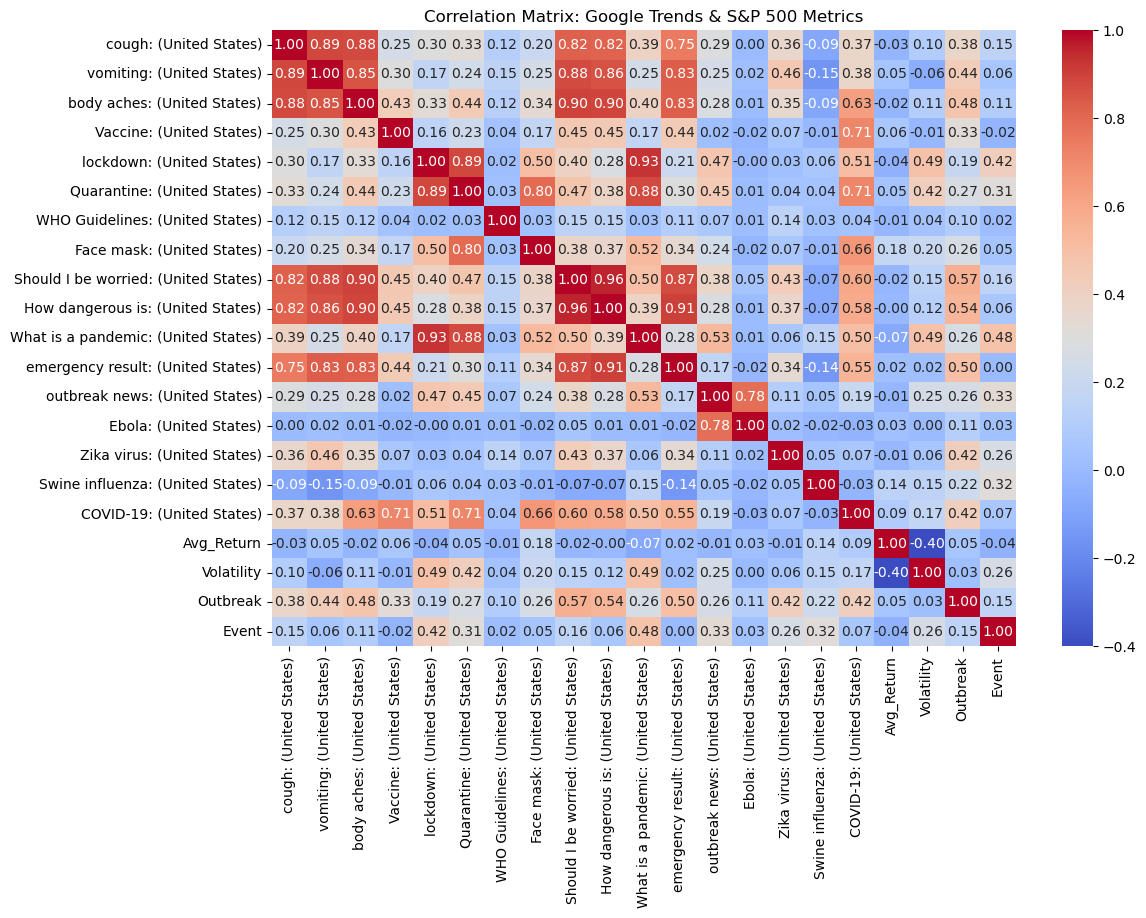

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
correlation_data = merged_df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Google Trends & S&P 500 Metrics")
plt.savefig("analysis/correlation_heatmap.png")
plt.show()


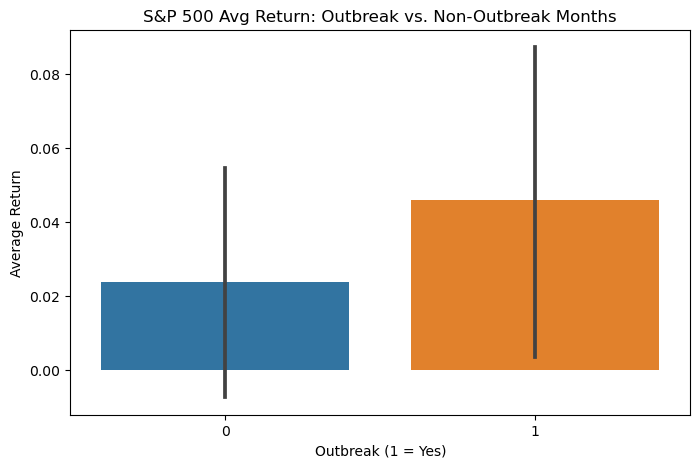

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='Outbreak', y='Avg_Return')
plt.title("S&P 500 Avg Return: Outbreak vs. Non-Outbreak Months")
plt.xlabel("Outbreak (1 = Yes)")
plt.ylabel("Average Return")
plt.savefig("analysis/sp500_outbrk_vs_no_outbrk.png")
plt.show()


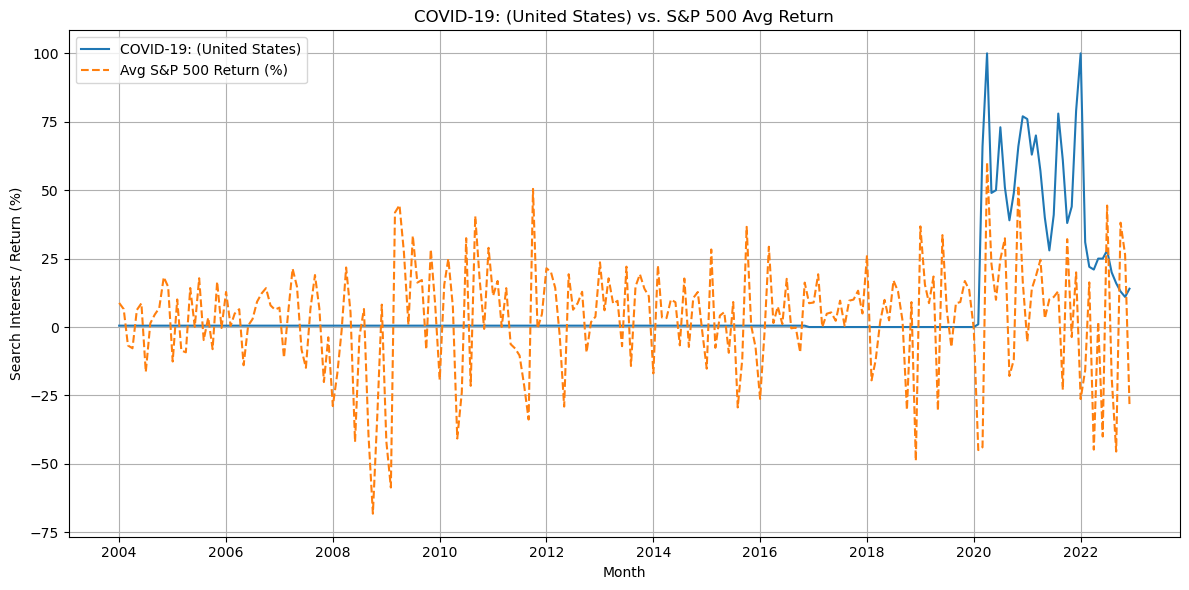

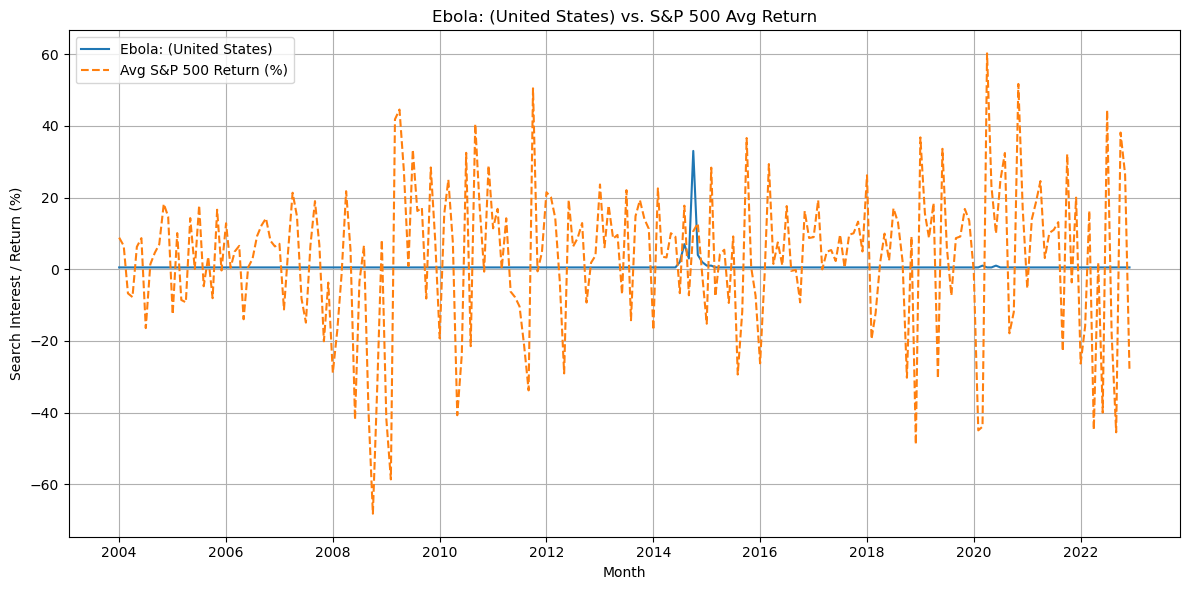

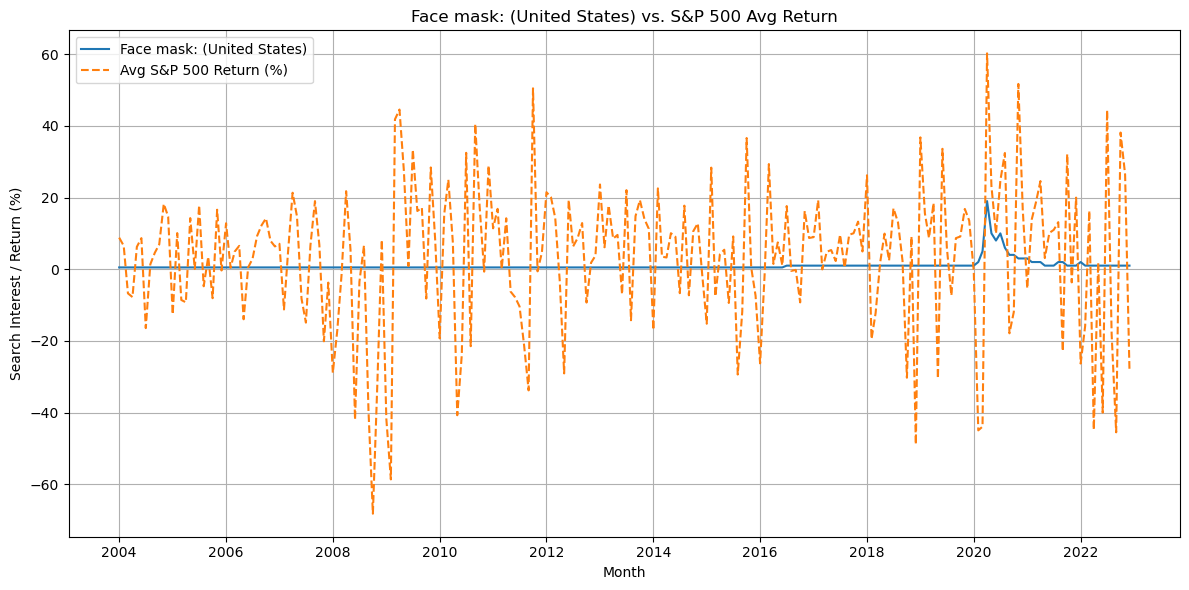

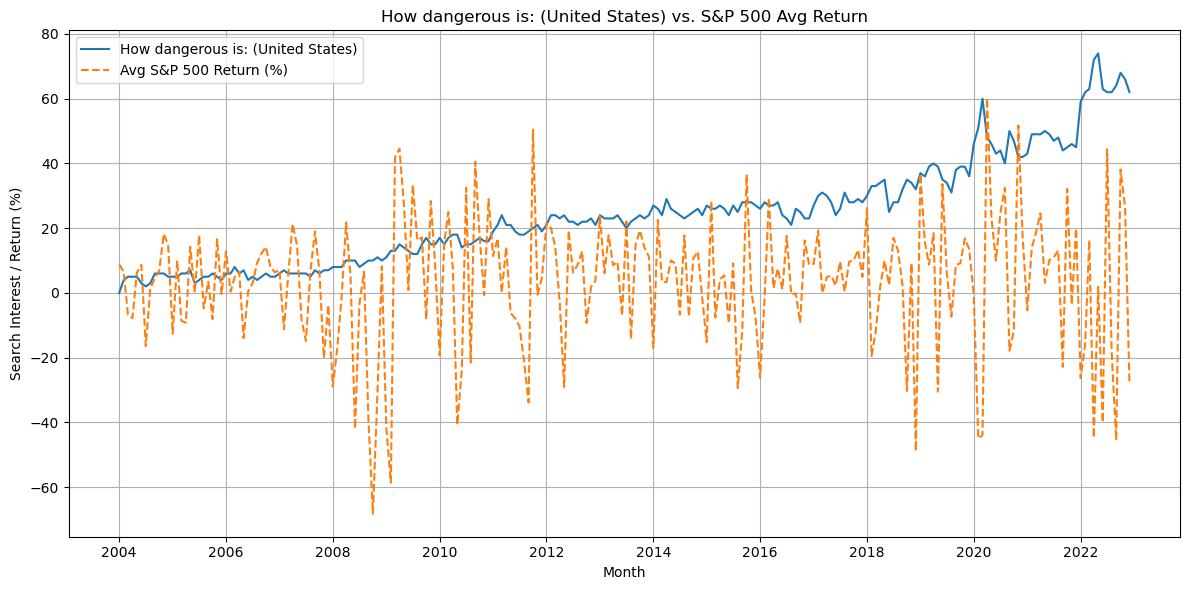

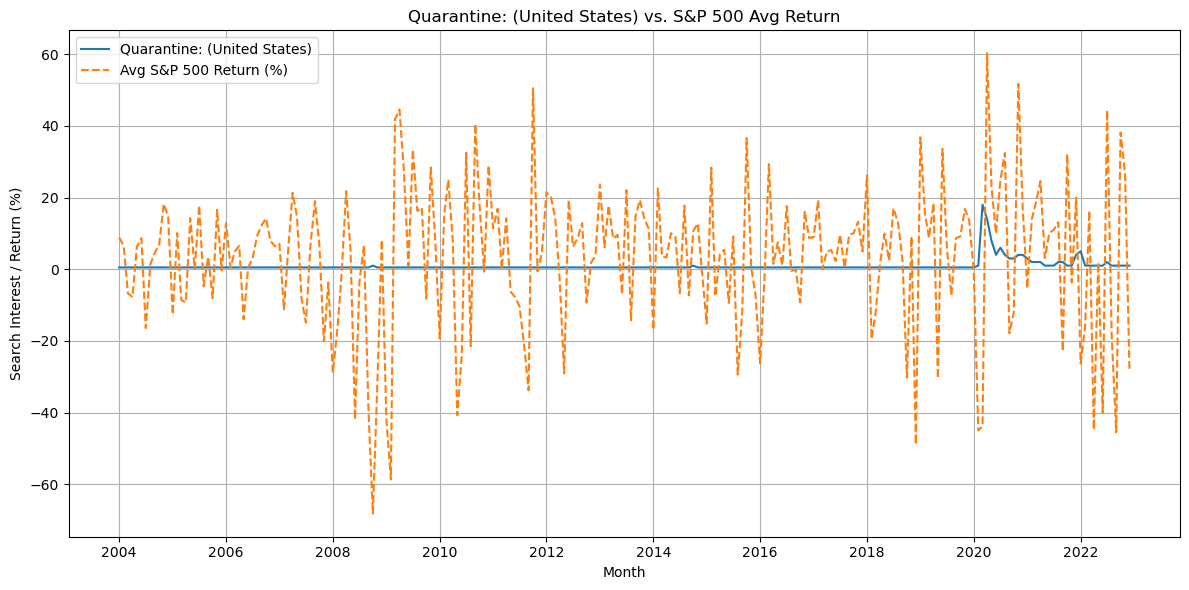

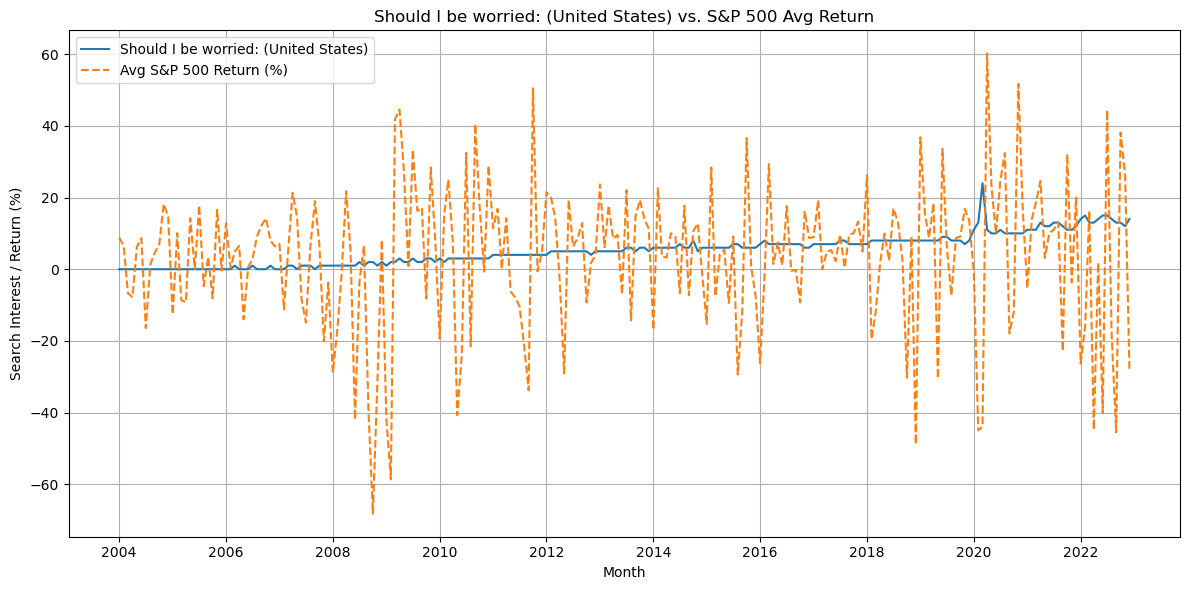

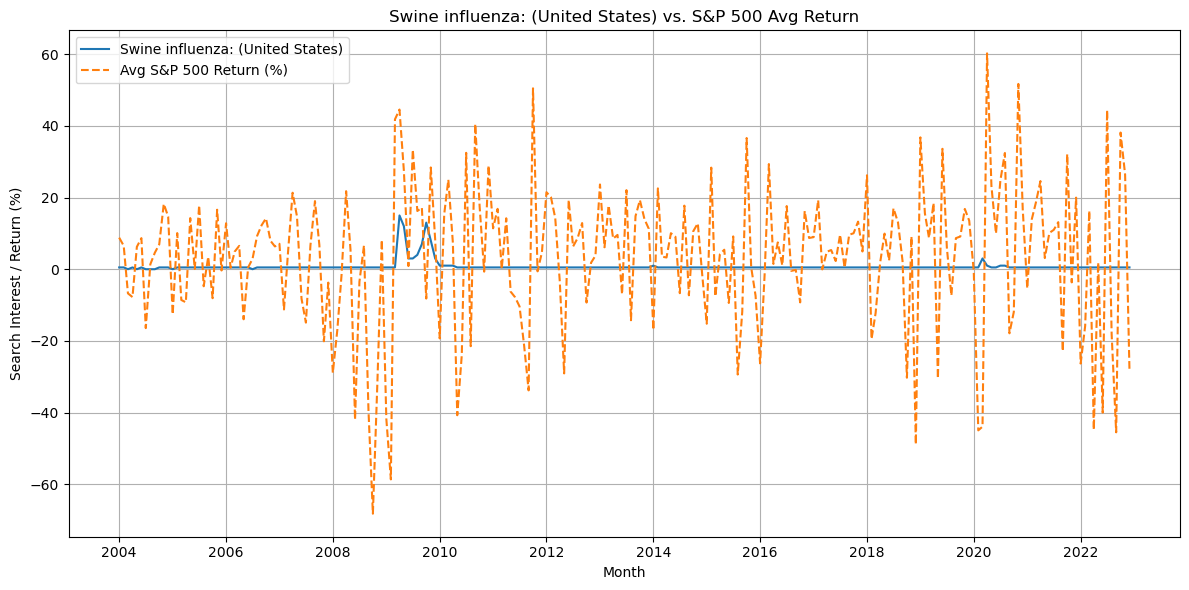

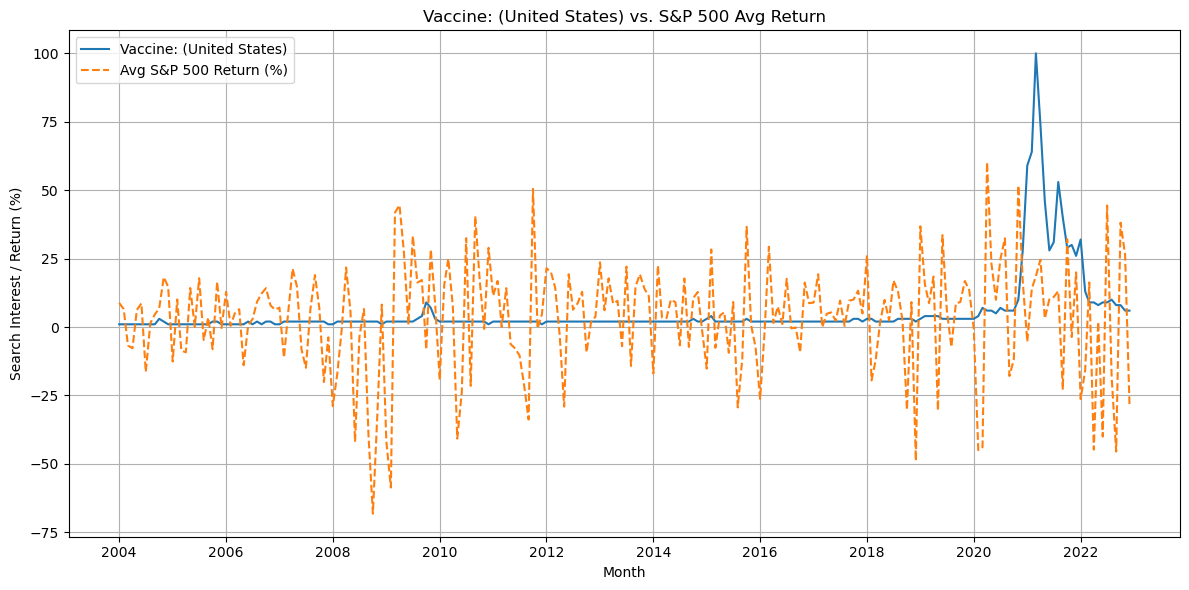

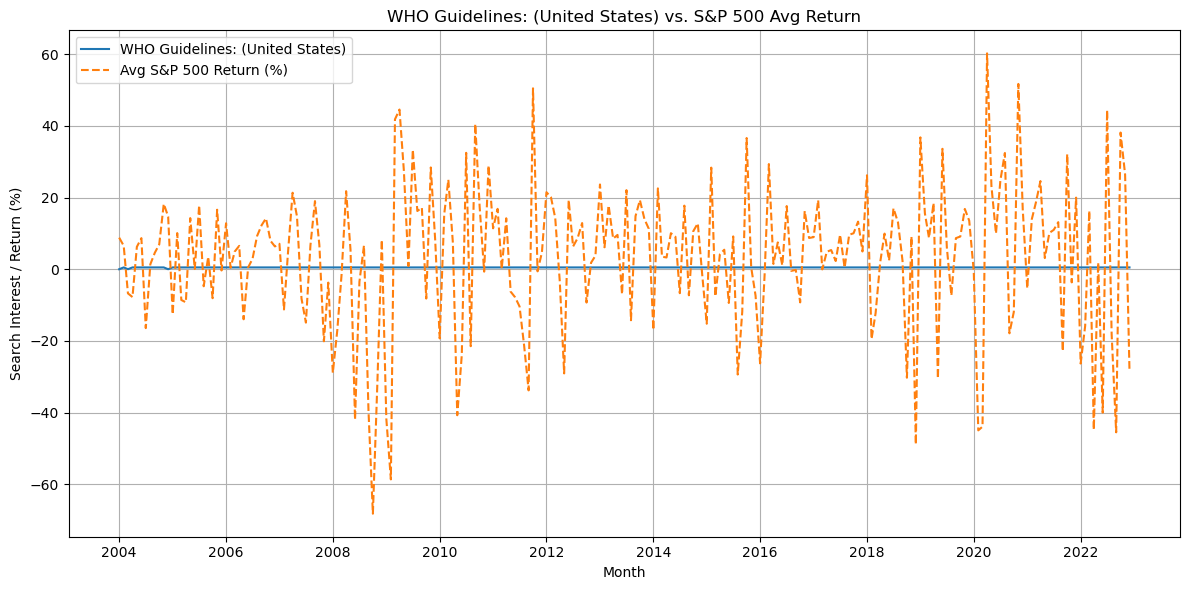

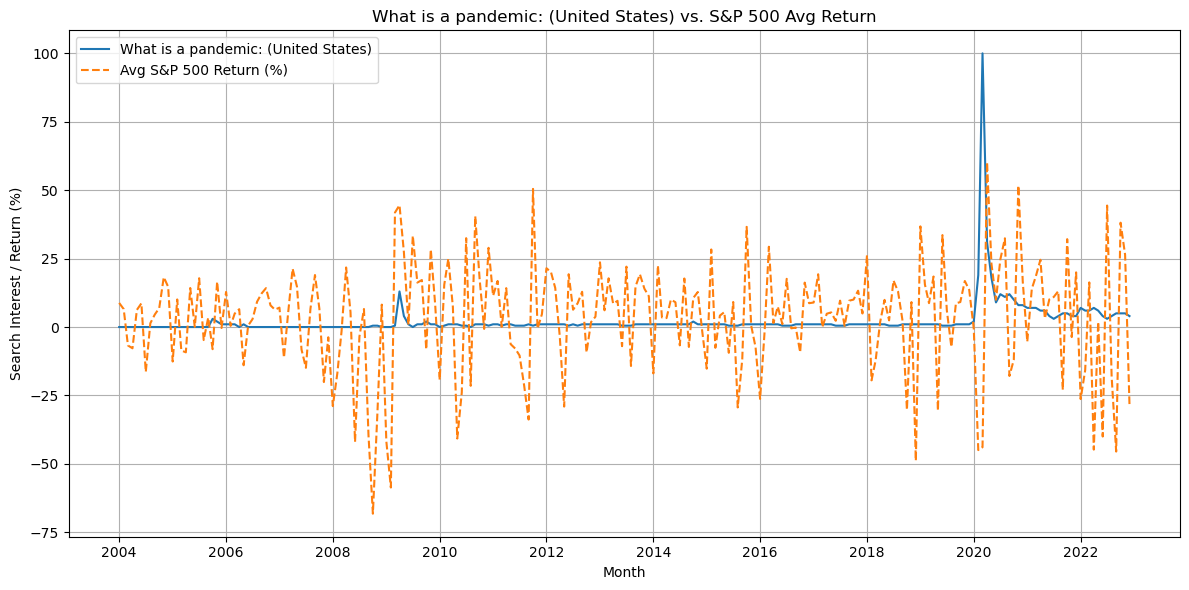

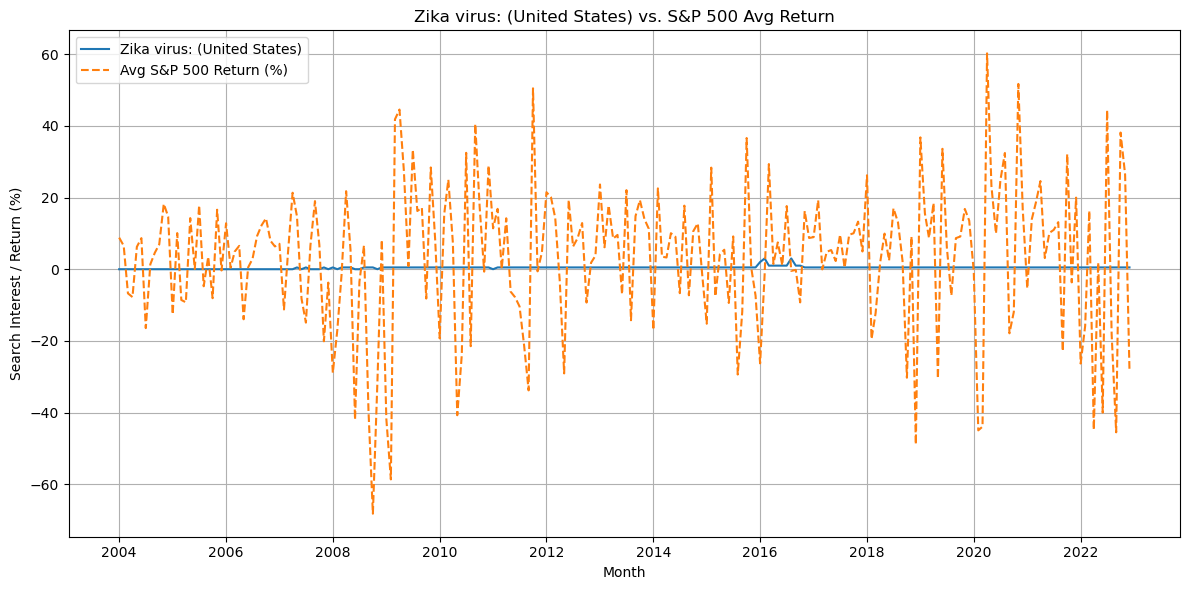

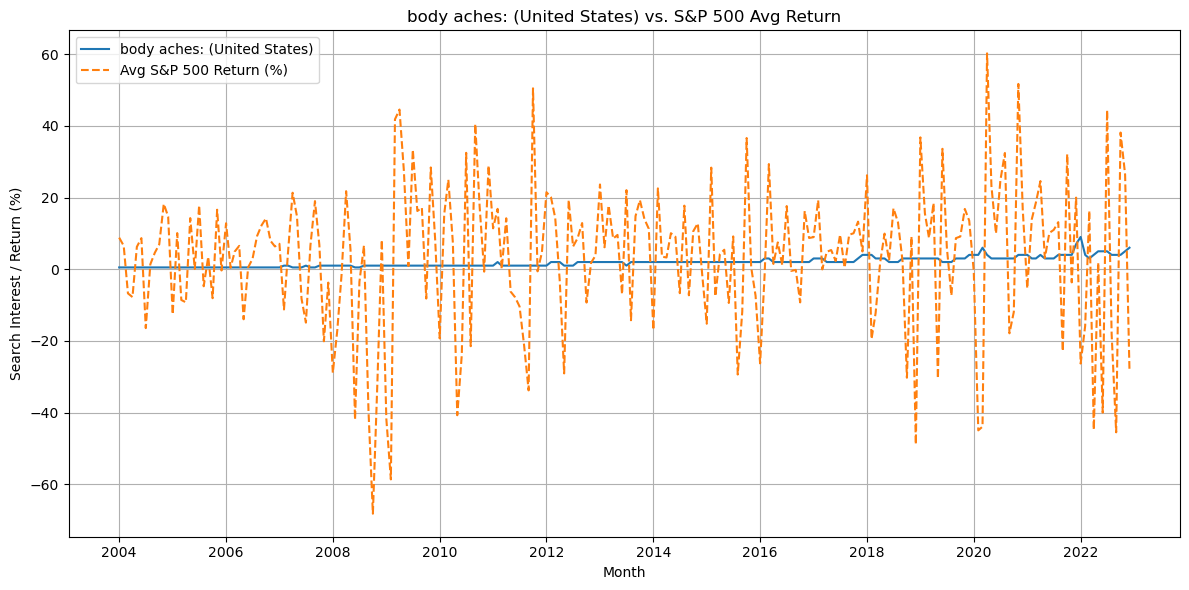

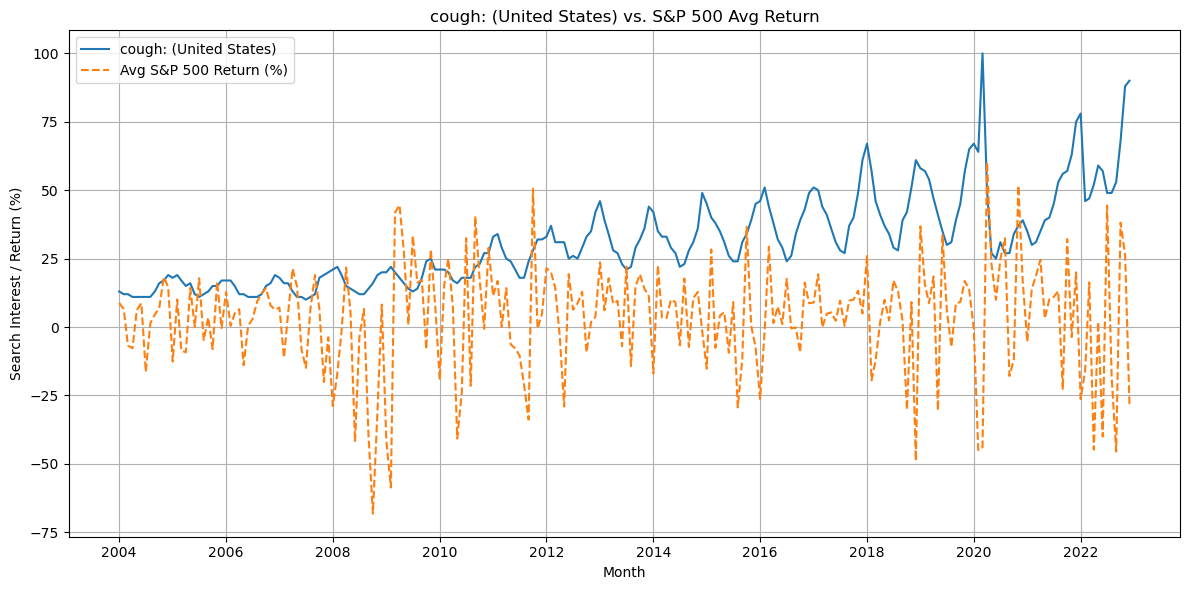

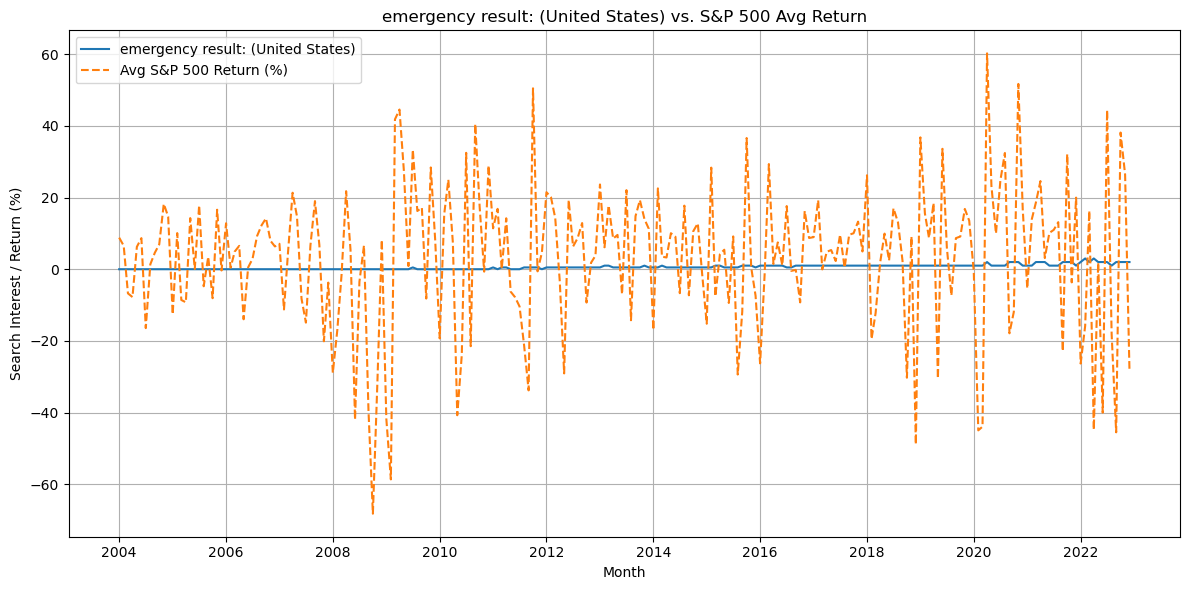

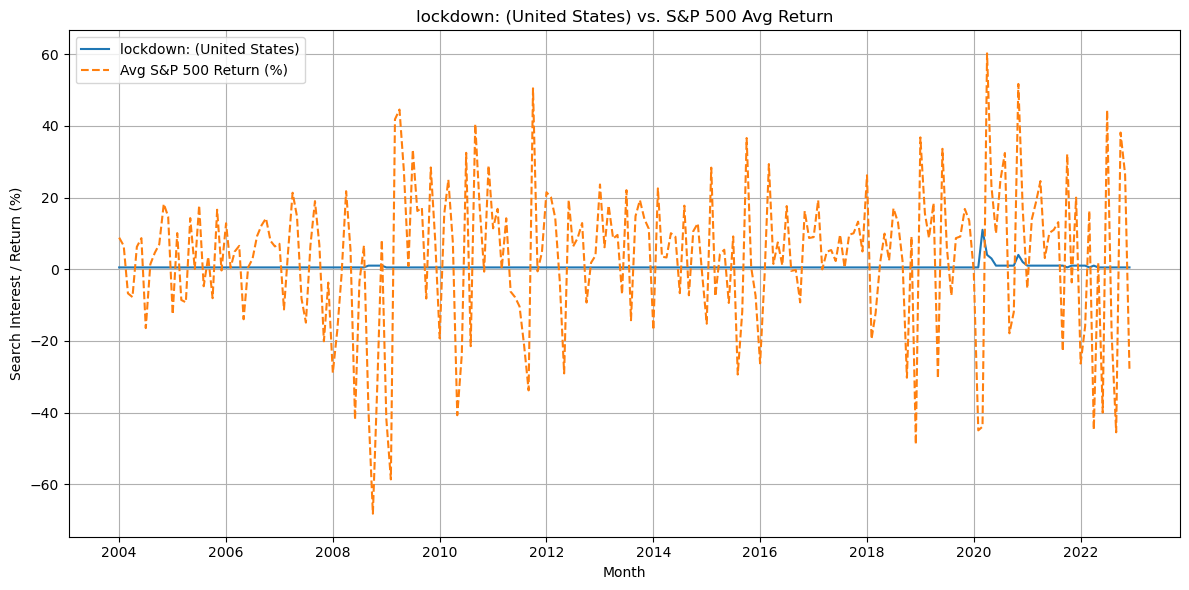

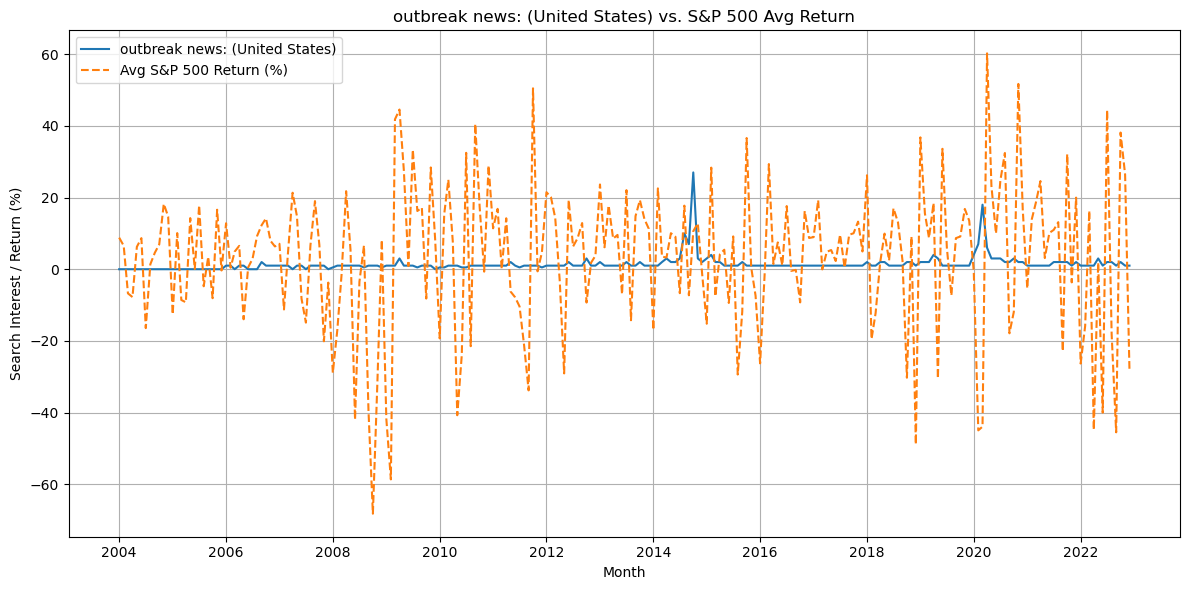

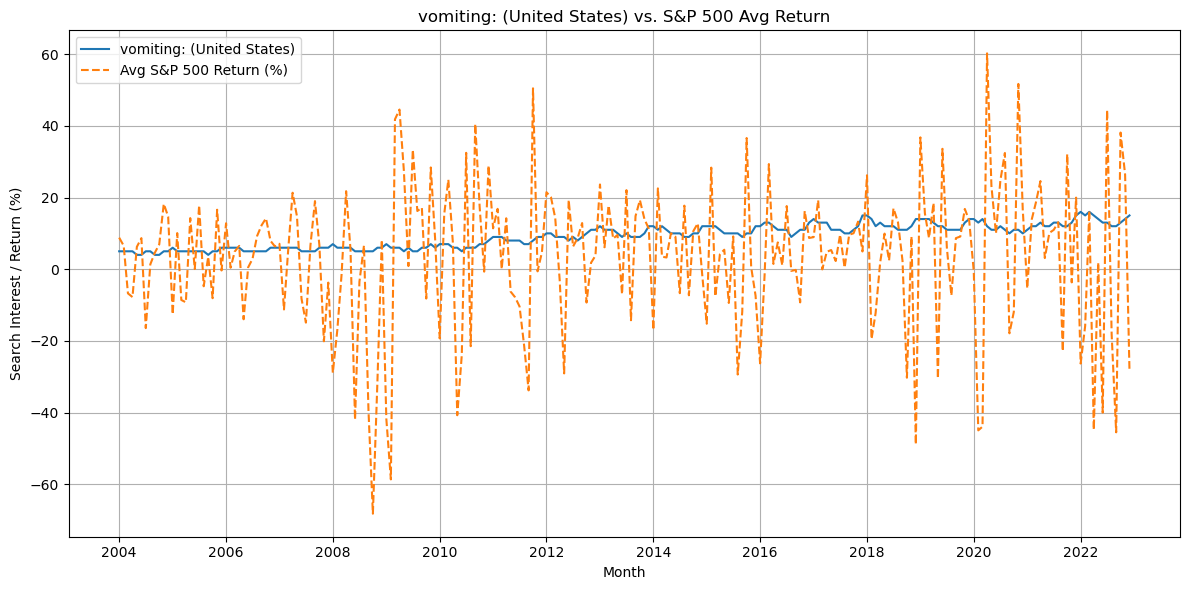

In [14]:
import matplotlib.pyplot as plt

# List all Google Trends search columns (excluding non-trend columns)
trend_columns = merged_df.columns.difference(['Month', 'Avg_Return', 'Volatility', 'Outbreak', 'Event'])

# Loop through each trend term and create a line plot
for term in trend_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['Month'], merged_df[term], label=term)
    plt.plot(merged_df['Month'], merged_df['Avg_Return'] * 100, label='Avg S&P 500 Return (%)', linestyle='--')
    plt.title(f"{term} vs. S&P 500 Avg Return")
    plt.xlabel("Month")
    plt.ylabel("Search Interest / Return (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


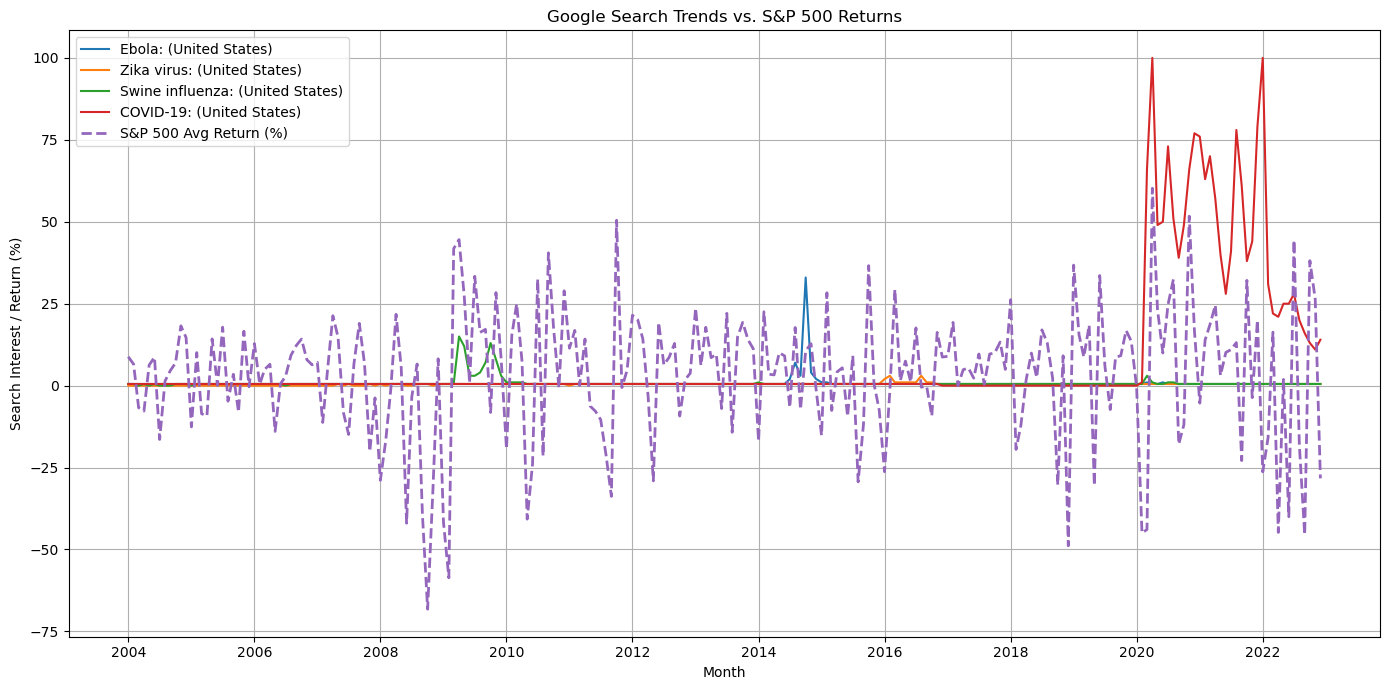

In [16]:
import matplotlib.pyplot as plt

# Select terms representing key outbreaks
terms = [
    "Ebola: (United States)",
    "Zika virus: (United States)",
    "Swine influenza: (United States)", 
    "COVID-19: (United States)"         
]

plt.figure(figsize=(14, 7))

for term in terms:
    plt.plot(merged_df['Month'], merged_df[term], label=term)

# Add Avg Return
plt.plot(merged_df['Month'], merged_df['Avg_Return'] * 100, label="S&P 500 Avg Return (%)", linestyle='--', linewidth=2)

plt.title("Google Search Trends vs. S&P 500 Returns")
plt.xlabel("Month")
plt.ylabel("Search Interest / Return (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot
plt.savefig("analysis/multi_trend_vs_return.png")
plt.show()


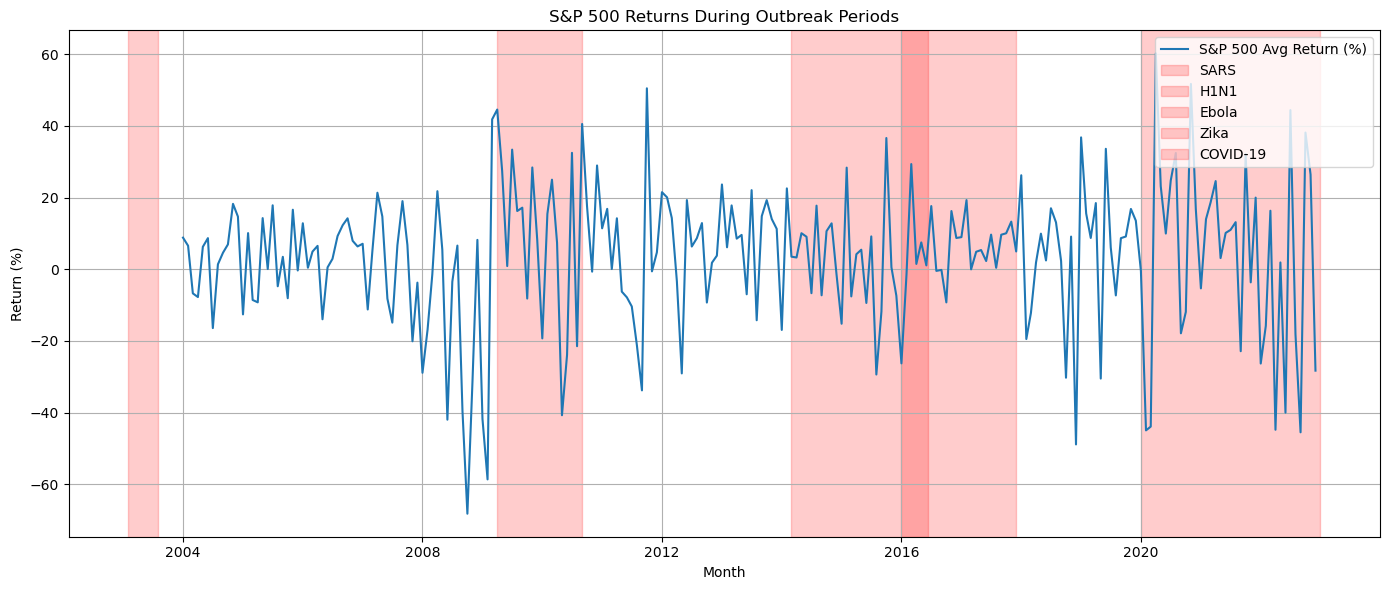

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(merged_df['Month'], merged_df['Avg_Return'] * 100, label='S&P 500 Avg Return (%)')

# Shade outbreak periods
for _, row in outbreak_events.iterrows():
    plt.axvspan(row['start_date'], row['end_date'], color='red', alpha=0.2, label=row['outbreak'])

plt.title("S&P 500 Returns During Outbreak Periods")
plt.xlabel("Month")
plt.ylabel("Return (%)")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.savefig("analysis/returns_with_outbreaks.png")
plt.show()


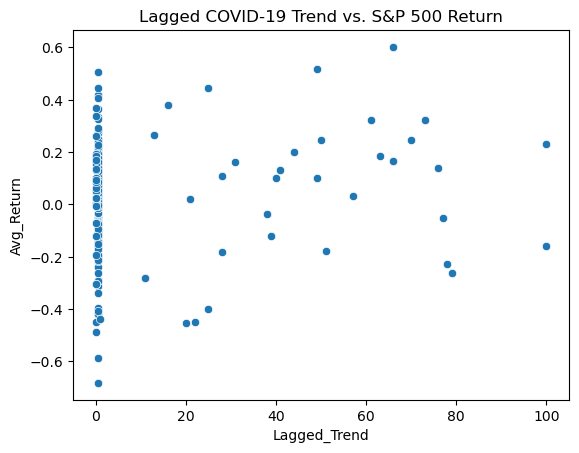

In [23]:
# Lag trends by 1 month
lagged_df = merged_df.copy()
lagged_df['Lagged_Trend'] = lagged_df["COVID-19: (United States)"].shift(1)
sns.scatterplot(data=lagged_df, x='Lagged_Trend', y='Avg_Return')
plt.title("Lagged COVID-19 Trend vs. S&P 500 Return")
plt.savefig("analysis/lagged_covid_vs_return.png")
plt.show()


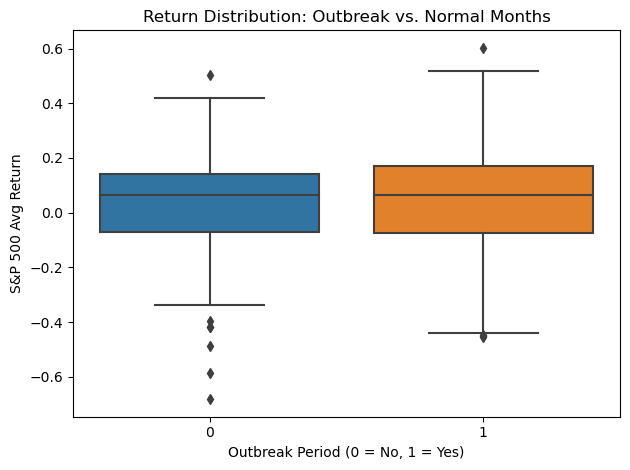

In [24]:
import seaborn as sns

sns.boxplot(data=merged_df, x='Outbreak', y='Avg_Return')
plt.title("Return Distribution: Outbreak vs. Normal Months")
plt.xlabel("Outbreak Period (0 = No, 1 = Yes)")
plt.ylabel("S&P 500 Avg Return")
plt.tight_layout()
plt.savefig("analysis/boxplot_outbreak_vs_return.png")
plt.show()


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


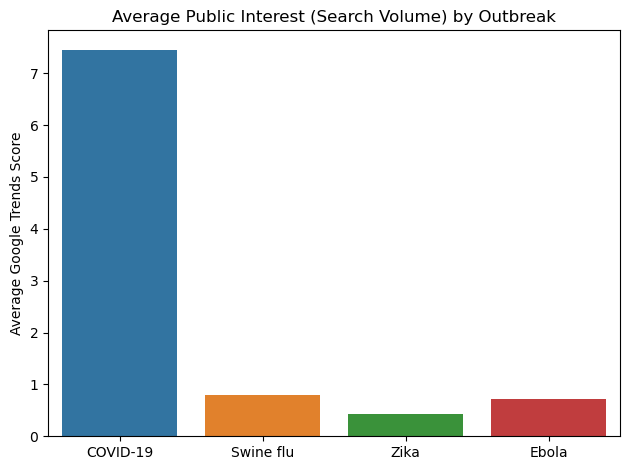

In [26]:
import numpy as np

outbreak_avg_search = {
    "COVID-19": merged_df["COVID-19: (United States)"].mean(),
    "Swine flu": merged_df["Swine influenza: (United States)"].mean(),
    "Zika": merged_df["Zika virus: (United States)"].mean(),
    "Ebola": merged_df["Ebola: (United States)"].mean()
}

sns.barplot(x=list(outbreak_avg_search.keys()), y=list(outbreak_avg_search.values()))
plt.title("Average Public Interest (Search Volume) by Outbreak")
plt.ylabel("Average Google Trends Score")
plt.tight_layout()
plt.savefig("analysis/avg_interest_by_outbreak.png")
plt.show()


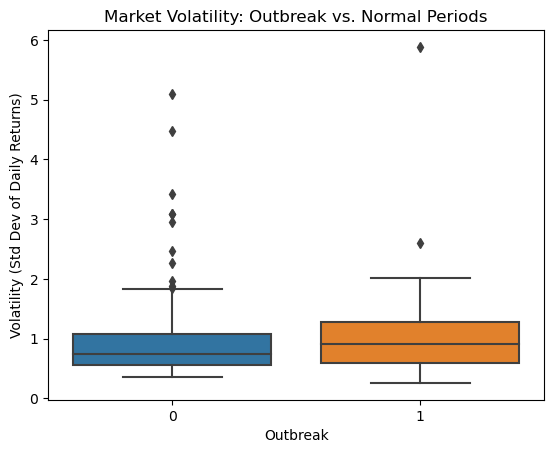

In [27]:
sns.boxplot(data=merged_df, x='Outbreak', y='Volatility')
plt.title("Market Volatility: Outbreak vs. Normal Periods")
plt.ylabel("Volatility (Std Dev of Daily Returns)")
plt.savefig("analysis/volatility_outbreak_vs_normal.png")
plt.show()


/tmp/ipykernel_234/4223830921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sars_df['Month'] = sars_df['Date'].dt.to_period('M').dt.to_timestamp()


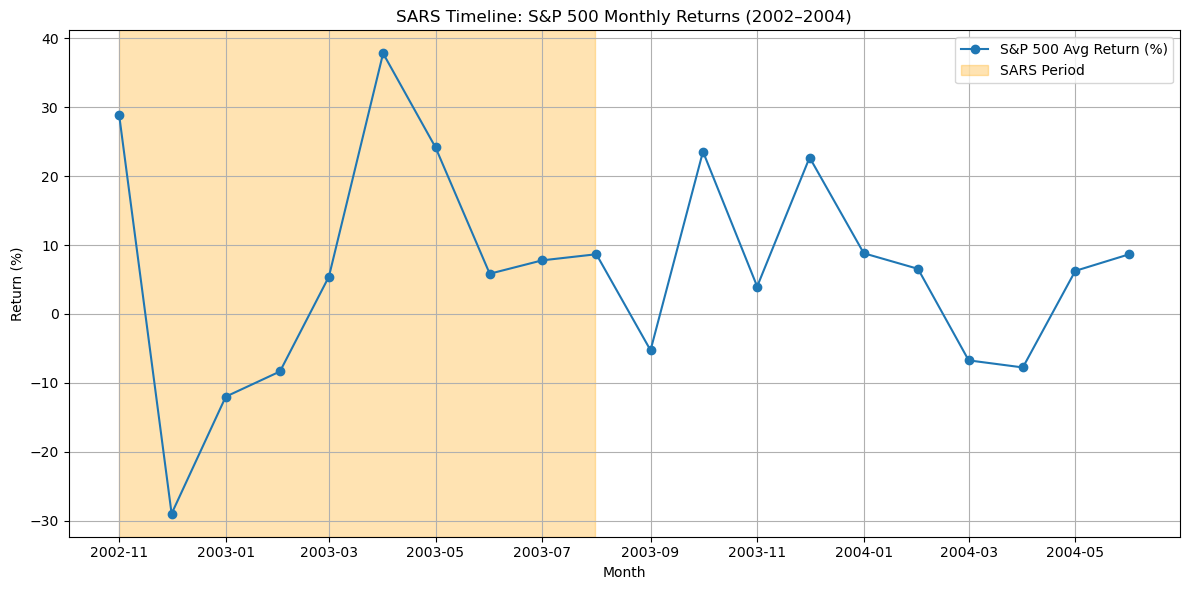

In [28]:
# Filter S&P data for SARS timeline
sars_df = sp500_df[(sp500_df['Date'] >= '2002-11-01') & (sp500_df['Date'] <= '2004-06-30')]

# Aggregate to monthly (if not already done)
sars_df['Month'] = sars_df['Date'].dt.to_period('M').dt.to_timestamp()
sars_monthly = sars_df.groupby('Month')['Return'].agg(['mean', 'std']).reset_index()
sars_monthly.columns = ['Month', 'Avg_Return', 'Volatility']

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sars_monthly['Month'], sars_monthly['Avg_Return'] * 100, marker='o', label='S&P 500 Avg Return (%)')
plt.title("SARS Timeline: S&P 500 Monthly Returns (2002–2004)")
plt.xlabel("Month")
plt.ylabel("Return (%)")
plt.grid(True)
plt.axvspan(pd.to_datetime("2002-11-01"), pd.to_datetime("2003-07-31"), color='orange', alpha=0.3, label='SARS Period')
plt.legend()
plt.tight_layout()
plt.savefig("analysis/sars_return_timeline.png")
plt.show()


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


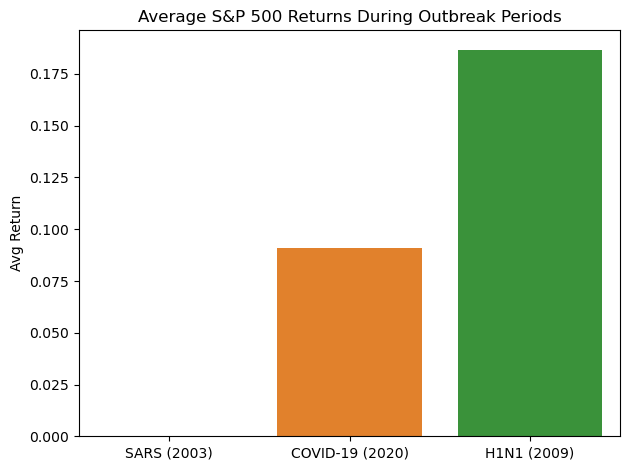

In [29]:
# Example: create avg return during SARS vs COVID vs H1N1
sars_period = (sp500_monthly['Month'] >= '2002-11-01') & (sp500_monthly['Month'] <= '2003-07-31')
covid_period = (sp500_monthly['Month'] >= '2020-02-01') & (sp500_monthly['Month'] <= '2020-12-01')
h1n1_period = (sp500_monthly['Month'] >= '2009-04-01') & (sp500_monthly['Month'] <= '2009-12-01')

avg_returns = {
    'SARS (2003)': sp500_monthly.loc[sars_period, 'Avg_Return'].mean(),
    'COVID-19 (2020)': sp500_monthly.loc[covid_period, 'Avg_Return'].mean(),
    'H1N1 (2009)': sp500_monthly.loc[h1n1_period, 'Avg_Return'].mean()
}

import seaborn as sns

sns.barplot(x=list(avg_returns.keys()), y=list(avg_returns.values()))
plt.title("Average S&P 500 Returns During Outbreak Periods")
plt.ylabel("Avg Return")
plt.tight_layout()
plt.savefig("analysis/outbreak_avg_return_comparison.png")
plt.show()


In [32]:
from scipy.stats import ttest_ind

# Split data into two groups
outbreak_returns = merged_df[merged_df['Outbreak'] == 1]['Avg_Return']
normal_returns = merged_df[merged_df['Outbreak'] == 0]['Avg_Return']

# Run t-test
t_stat, p_val = ttest_ind(outbreak_returns, normal_returns, equal_var=False)

# Save results to text file
with open("analysis/t_test_outbreak_vs_normal.txt", "w") as f:
    f.write(" T-Test: Returns During Outbreak vs. Normal Months\n")
    f.write(f"T-Statistic: {t_stat:.4f}\n")
    f.write(f"P-Value: {p_val:.4f}\n")
    f.write(" Significant difference\n" if p_val < 0.05 else " Not statistically significant\n")



In [33]:
import statsmodels.api as sm

# Shift COVID searches by 1 month forward
merged_df['Lagged_COVID'] = merged_df["COVID-19: (United States)"].shift(1)

# Remove missing rows
reg_df = merged_df.dropna(subset=['Lagged_COVID', 'Avg_Return'])

# Run regression: Return ~ Lagged Search
X = sm.add_constant(reg_df['Lagged_COVID'])  # predictor
y = reg_df['Avg_Return']                     # target
model = sm.OLS(y, X).fit()

# Save the summary
with open("analysis/lagged_regression_covid.txt", "w") as f:
    f.write(" Regression: Does Last Month's COVID Search Predict Returns?\n\n")
    f.write(model.summary().as_text())


In [34]:
# Volatility during vs. outside outbreak months
outbreak_vol = merged_df[merged_df['Outbreak'] == 1]['Volatility']
normal_vol = merged_df[merged_df['Outbreak'] == 0]['Volatility']

# Run t-test
t_stat_v, p_val_v = ttest_ind(outbreak_vol, normal_vol, equal_var=False)

# Save result
with open("analysis/t_test_volatility.txt", "w") as f:
    f.write(" T-Test: Volatility During Outbreak vs. Normal Months\n")
    f.write(f"T-Statistic: {t_stat_v:.4f}\n")
    f.write(f"P-Value: {p_val_v:.4f}\n")
    f.write("Significant difference in volatility\n" if p_val_v < 0.05 else " Not statistically significant\n")
